In [1]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#My Twitter API Authentication Variables
consumer_key = '95yto7dDmGabiDx3jInpKj9WY'
consumer_secret = 'jFKsqG1QTdPNMH7PqIjh6OpvtA8gQ7YzxGSVCNHP7SeXdvr8hM'
access_token = '1380365438-jyLgYMarjlNdWkOQNOUSSt7jBW9Jje7FTD2MvNe'
access_token_secret = 'eyZ3qg7vSJdEop4s3q9aoZ0LH99qTRMes3mYTtSs7oyS8'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api= tweepy.API(auth)

In [6]:
import re
def clean_tweet(tweet):
  '''utility function to clean a text in a tweet by removing linksnand special characters regex'''
  return ''.join(re.sub("(@[A-Za-Z0-9]+)|([^0-9A-Za-z\t])|(\w+i\/\/\s+)"),'',tweet).split()
that_word = 'Depression'
tweets= api.search(that_word,count=100)

In [7]:
data=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweets'])
print(data.head(10))
print(tweets[0].created_at)

                                              Tweets
0  Vintage 1950s Anchor Hocking Forest Green Depr...
1  RT @R0SCO3: Self loathing will devour you\nRes...
2  RT @TevinVassell: Suicide - 0800567567\nRape -...
3  RT @TevinVassell: Suicide - 0800567567\nRape -...
4  RT @BetteMidler: #DonaldTrump has forced us to...
5  RT @SerophaneTape: mob psycho: your life is yo...
6  RT @TimetoChange: "I always reach out if I see...
7  RT @depressionarmy: Mornings are so difficult ...
8  RT @CUnderwoodUK: My dad didn't die because he...
9  RT @TevinVassell: Suicide - 0800567567\nRape -...
2019-03-25 12:14:24


In [9]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

data.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Tweets,polarity
0,Vintage 1950s Anchor Hocking Forest Green Depr...,"{'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'comp..."
1,RT @R0SCO3: Self loathing will devour you\nRes...,"{'neg': 0.483, 'neu': 0.517, 'pos': 0.0, 'comp..."
2,RT @TevinVassell: Suicide - 0800567567\nRape -...,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp..."
3,RT @TevinVassell: Suicide - 0800567567\nRape -...,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp..."
4,RT @BetteMidler: #DonaldTrump has forced us to...,"{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'comp..."
5,RT @SerophaneTape: mob psycho: your life is yo...,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp..."
6,"RT @TimetoChange: ""I always reach out if I see...","{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou..."
7,RT @depressionarmy: Mornings are so difficult ...,"{'neg': 0.465, 'neu': 0.535, 'pos': 0.0, 'comp..."
8,RT @CUnderwoodUK: My dad didn't die because he...,"{'neg': 0.098, 'neu': 0.713, 'pos': 0.188, 'co..."
9,RT @TevinVassell: Suicide - 0800567567\nRape -...,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp..."


In [10]:
import matplotlib.pyplot as plt

In [11]:
# gloabl variable to store values
neg, neu, pos = 0, 0, 0

In [12]:
# taking values out of each tweet to add to our global variable
for tweet in data['polarity']:
  neg += tweet['neg']
  neu += tweet['neu']
  pos += tweet['pos']

In [13]:
labels = 'negative', 'neutral', 'positive'
sizes = [neg, neu, pos]
explode = (0.1, 0, 0)
colors = ['#EA8A8D', '#E9E9E9', '#3EDC81']

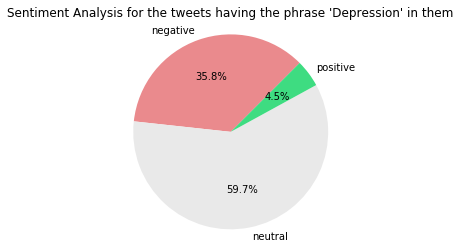

In [14]:
ig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=45, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f"Sentiment Analysis for the tweets having the phrase 'Depression' in them")
fig1 = plt.gcf()

plt.show()
plt.draw()